In [1]:
import tensorflow as tf
import keras.utils
from tensorflow import keras
from keras import layers, Input
from keras.layers import Dense, InputLayer, Flatten
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, LearningRateScheduler, ReduceLROnPlateau

from  matplotlib import pyplot as plt

%matplotlib inline


In [2]:
import sys
print (sys.version)

3.10.8 (tags/v3.10.8:aaaf517, Oct 11 2022, 16:50:30) [MSC v.1933 64 bit (AMD64)]


In [3]:
print(tf.__version__)

2.9.0


In [4]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [6]:
tf.test.is_built_with_cuda()
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [8]:
# split data
import splitfolders
splitfolders.ratio(r'images\train', output="output", seed=2137, ratio=(.8, 0.1,0.1)) 

In [4]:
train_path = r'C:\Users\pbirylo\Desktop\grzyby_projekt\output\train'
test_path = r'C:\Users\pbirylo\Desktop\grzyby_projekt\output\test'
valid_path = r'C:\Users\pbirylo\Desktop\grzyby_projekt\output\val'

IMG_SHAPE = (244, 244)
BATCH_SIZE = 1

Found 188 images belonging to 10 classes.


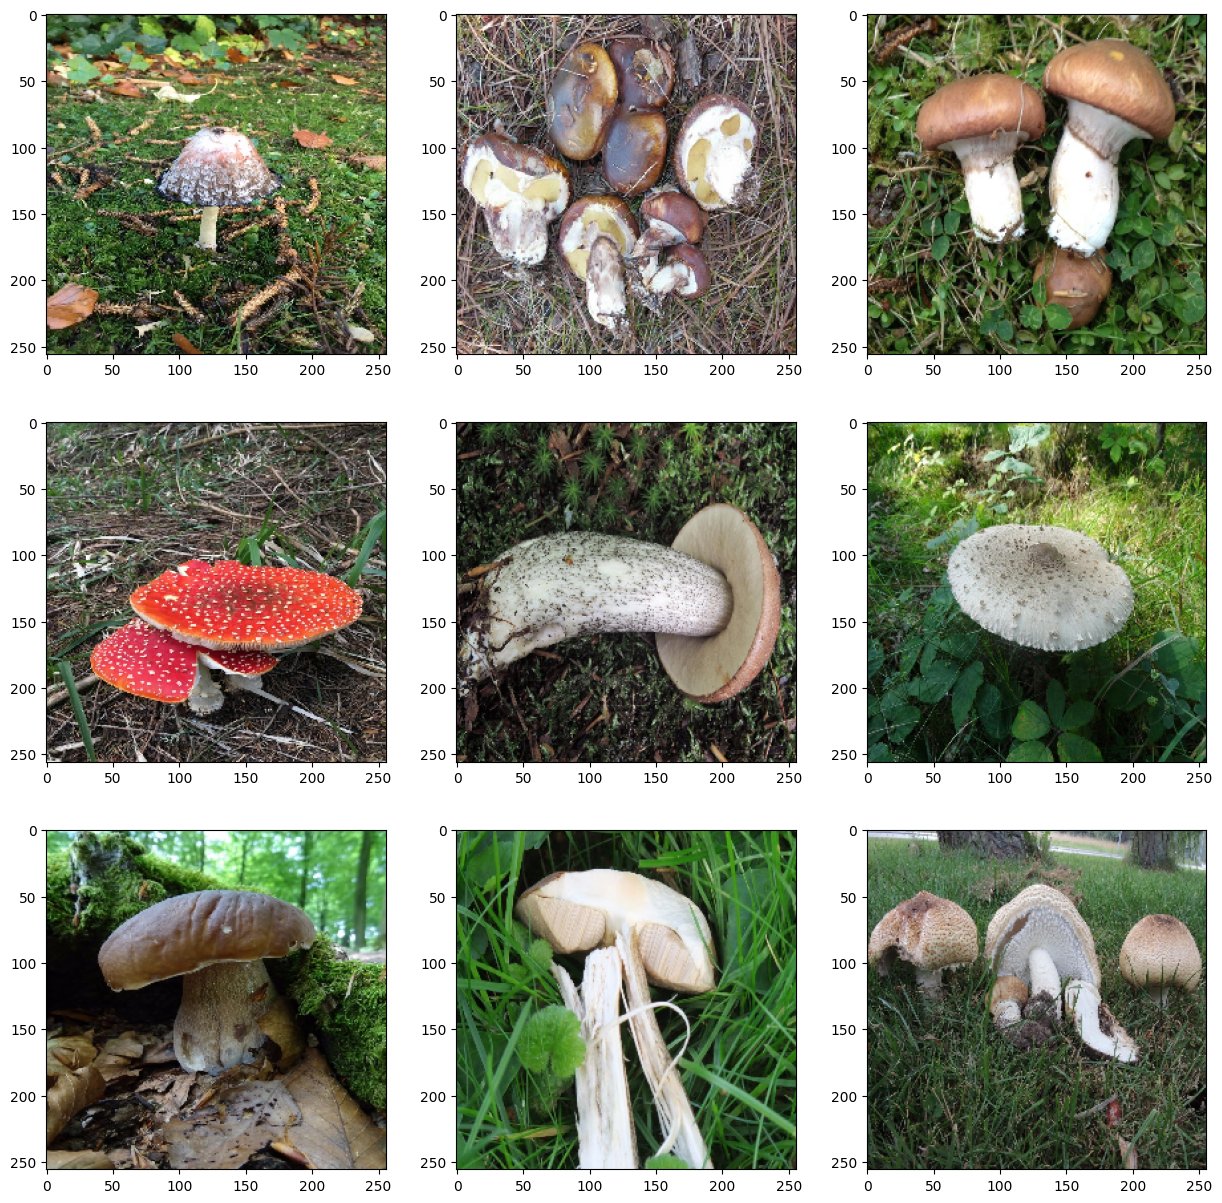

In [10]:
sample_generator = ImageDataGenerator().flow_from_directory(valid_path, shuffle = True)

plt.figure(figsize = (15,15))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = sample_generator.next()[0]
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  label_mode = 'categorical',
  image_size = IMG_SHAPE,
  batch_size = BATCH_SIZE)

Found 1525 files belonging to 10 classes.


In [12]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  label_mode = 'categorical',
  image_size = IMG_SHAPE,
  batch_size = BATCH_SIZE)

Found 199 files belonging to 10 classes.


In [13]:
valid_ds = tf.keras.utils.image_dataset_from_directory(
  valid_path,
  label_mode = 'categorical',
  image_size = IMG_SHAPE,
  batch_size = BATCH_SIZE)

Found 188 files belonging to 10 classes.


In [6]:
class_names = train_ds.class_names


In [7]:
print(class_names)

['borowikaszlachetny-Boletus_edulis', 'czernikdlakkolpakowaty-Coprinus_comatus', 'czubajkakania-Macrolepiota_procera', 'kozlarzbabka-Leccinum_scabrum', 'maślakzwyczajny-Suillus_luteus', 'muchomorczerwony-Amanita_muscaria', 'opienkamiodowa-Armillaria_mellea', 'pieczarkabiaława-Agaricus_arvensis', 'pieczarkaokazala-Agaricus_augustus', 'pieprznikjadalny-Cantharellus_cibarius']


In [16]:
train_ds = train_ds.cache()
test_ds = test_ds.cache()
valid_ds = valid_ds.cache()

In [17]:
num_classes = len(class_names)

In [18]:
tf.keras.backend.clear_session()

In [19]:
data_augmentation = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2,fill_mode = 'nearest')
])

In [20]:
base_model = tf.keras.applications.EfficientNetB7(include_top=False)

In [21]:
inputs = tf.keras.Input(shape = (244,244,3))
x = data_augmentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name = 'Global_Average_Pool_2D')(x)

outputs = layers.Dense(num_classes, activation = 'softmax')(x)

In [22]:
model = keras.Model(inputs, outputs, name = "model")

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 244, 244, 3)       0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 Global_Average_Pool_2D (Glo  (None, 2560)             0         
 balAveragePooling2D)                                            
                                                                 
 dense (Dense)               (None, 10)                25610     
                                                                 
Total params: 64,123,297
Trainable params: 63,812,570
Non-trainable params: 310,727
___________________________________________

In [24]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001, momentum = 0.9, nesterov = True),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [25]:
history = model.fit( 
    train_ds, 
    steps_per_epoch = len(train_ds), 
    epochs = 5,
    validation_data = valid_ds,
    validation_steps = len(valid_ds),
)

Epoch 1/5
1525/1525 [==============================] - 456s 281ms/step - loss: 1.0842 - accuracy: 0.6400 - val_loss: 0.5574 - val_accuracy: 0.8138
Epoch 2/5
1525/1525 [==============================] - 431s 283ms/step - loss: 0.4952 - accuracy: 0.8367 - val_loss: 0.5659 - val_accuracy: 0.8138
Epoch 3/5
1525/1525 [==============================] - 429s 281ms/step - loss: 0.2586 - accuracy: 0.9128 - val_loss: 0.3449 - val_accuracy: 0.9096
Epoch 4/5
1525/1525 [==============================] - 427s 280ms/step - loss: 0.2050 - accuracy: 0.9338 - val_loss: 0.4207 - val_accuracy: 0.8777
Epoch 5/5
1525/1525 [==============================] - 428s 280ms/step - loss: 0.1856 - accuracy: 0.9423 - val_loss: 0.2670 - val_accuracy: 0.9255


In [26]:
model.save('trening0801/model1')
#loaded_model = tf.keras.models.load_model('/tmp/model')

INFO:tensorflow:Assets written to: trening0801/model1\assets


INFO:tensorflow:Assets written to: trening0801/model1\assets


In [24]:
model.save('bezkozlarza/my_model4')

INFO:tensorflow:Assets written to: bezkozlarza/my_model4\assets


INFO:tensorflow:Assets written to: bezkozlarza/my_model4\assets


In [27]:
model.save_weights('./trening0801/my_checkpoint')

In [28]:
new_model = tf.saved_model.load('trening0801/model1')


In [2]:
loaded_model = tf.keras.models.load_model('trening0801/model1')
# Check its architecture
loaded_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 244, 244, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 244, 244, 3)       0         
                                                                 
 efficientnetb7 (Functional)  (None, None, None, 2560)  64097687 
                                                                 
 Global_Average_Pool_2D (Glo  (None, 2560)             0         
 balAveragePooling2D)                                            
                                                                 
 dense (Dense)               (None, 10)                25610     
                                                                 
Total params: 64,123,297
Trainable params: 63,812,570
Non-trainable params: 310,727
___________________________________________

In [29]:
from PIL import Image
import numpy as np
from skimage import transform

def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (244, 244, 3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image



In [30]:
img_path = r"C:\Users\pbirylo\Desktop\grzyby_projekt\output\test\muchomorczerwony-Amanita_muscaria\Amanita muscaria_28.jpg"

i = load(img_path)


In [31]:
model.predict(i)

1/1 [==============================] - 4s 4s/step


array([[0.05673782, 0.14144534, 0.02437794, 0.090146  , 0.07131738,
        0.04551933, 0.1237403 , 0.09658734, 0.0854694 , 0.2646591 ]],
      dtype=float32)

In [32]:
print(class_names)

['borowikaszlachetny-Boletus_edulis', 'czernikdlakkolpakowaty-Coprinus_comatus', 'czubajkakania-Macrolepiota_procera', 'kozlarzbabka-Leccinum_scabrum', 'maślakzwyczajny-Suillus_luteus', 'muchomorczerwony-Amanita_muscaria', 'opienkamiodowa-Armillaria_mellea', 'pieczarkabiaława-Agaricus_arvensis', 'pieczarkaokazala-Agaricus_augustus', 'pieprznikjadalny-Cantharellus_cibarius']


In [34]:
# predict the image

pred = model.predict(i)
print(pred)


1/1 [==============================] - 0s 77ms/step
[[0.05673782 0.14144534 0.02437794 0.090146   0.07131738 0.04551933
  0.1237403  0.09658734 0.0854694  0.2646591 ]]


['borowik_szlachetny', 'czubajka_kania', 'gasowka_fioletowa', 'kozlarz_babka', 'maslak_zwyczajny', 'muchomor_czerwony', 'muchomor_sromotnikowy', 'opienka_miodowa', 'pieczarka_okazala', 'pieprznik_jadalny']

In [35]:
img_path = r"C:\Users\pbirylo\Desktop\grzyby_projekt\output\test\pieprznikjadalny-Cantharellus_cibarius\FS2017-9215523_r1sjcsziZ.JPG"

i = load(img_path)

In [36]:
model.predict(i)

1/1 [==============================] - 0s 69ms/step


array([[0.05671674, 0.14160663, 0.0244862 , 0.09020481, 0.07133759,
        0.04558474, 0.12351314, 0.0968494 , 0.08554817, 0.26415262]],
      dtype=float32)

In [42]:
img = r'C:\Users\pbirylo\Desktop\grzyby_projekt\output\test\pieczarkabiaława-Agaricus_arvensis\EMB2013PIC37609075.JPG'
i = load(img)
model.predict(i)

1/1 [==============================] - 0s 78ms/step


array([[0.05679286, 0.14135998, 0.02432531, 0.09032148, 0.07134533,
        0.04549251, 0.12369311, 0.09658898, 0.08543915, 0.26464128]],
      dtype=float32)

In [43]:
loaded_model.predict(i)

1/1 [==============================] - 0s 80ms/step


array([[0.05679289, 0.14135996, 0.02432536, 0.09032159, 0.07134568,
        0.04549234, 0.12369374, 0.09658894, 0.08543884, 0.26464072]],
      dtype=float32)

In [45]:
loaded_model.make_predict_function(i)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [46]:
loaded_model.predict_function(i)

TypeError: in user code:

    File "c:\Users\pbirylo\Desktop\grzyby_projekt\.p\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\pbirylo\Desktop\grzyby_projekt\.p\lib\site-packages\keras\engine\training.py", line 1833, in step_function  **
        data = next(iterator)

    TypeError: 'Tensor' object is not an iterator


In [44]:
print(class_names)

['borowikaszlachetny-Boletus_edulis', 'czernikdlakkolpakowaty-Coprinus_comatus', 'czubajkakania-Macrolepiota_procera', 'kozlarzbabka-Leccinum_scabrum', 'maślakzwyczajny-Suillus_luteus', 'muchomorczerwony-Amanita_muscaria', 'opienkamiodowa-Armillaria_mellea', 'pieczarkabiaława-Agaricus_arvensis', 'pieczarkaokazala-Agaricus_augustus', 'pieprznikjadalny-Cantharellus_cibarius']


In [9]:
import numpy as np
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = r"C:\Users\pbirylo\Desktop\grzyby_projekt\output\test\muchomorczerwony-Amanita_muscaria\Amanita muscaria_28.jpg"

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(244, 244)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 153ms/step
This image most likely belongs to muchomorczerwony-Amanita_muscaria with a 23.20 percent confidence.


In [ ]:
import numpy as np
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = r"C:\Users\pbirylo\Desktop\grzyby_projekt\output\test\maślakzwyczajny-Suillus_luteus\Suillus luteus_106.jpg"

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(244, 244)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = loaded_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)